### Defining the available classification models

In [36]:
logr=LogisticRegression()
knn=KNeighborsClassifier(n_neighbors=3)
forest=RandomForestClassifier(max_depth=2)
adab=AdaBoostClassifier()
xgb=XGBClassifier(max_depth=2)

### Training the models

In [37]:
logr.fit(x_train,y_train)

LogisticRegression()

In [38]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [39]:
forest.fit(x_train,y_train)

RandomForestClassifier(max_depth=2)

In [40]:
adab.fit(x_train,y_train)

AdaBoostClassifier()

In [41]:
xgb.fit(x_train,y_train)

[22:40:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Evaluating model performances

In [42]:
model_list=[logr,knn,forest,adab,xgb]
model_accuracies=[]
for i in model_list:
    print('accuracy score for',i,'model is')
    print(accuracy_score(y_true=y_test,y_pred=i.predict(x_test.values)))
    model_accuracies.append(accuracy_score(y_true=y_test,y_pred=i.predict(x_test.values)))

accuracy score for LogisticRegression() model is
0.725
accuracy score for KNeighborsClassifier(n_neighbors=3) model is
0.5
accuracy score for RandomForestClassifier(max_depth=2) model is
0.8875
accuracy score for AdaBoostClassifier() model is
0.7166666666666667
accuracy score for XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) model is
0.9333333333333333


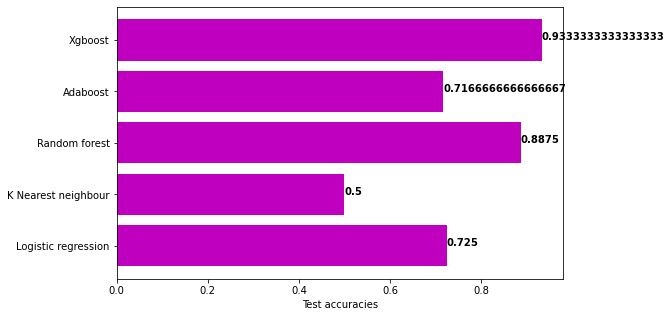

In [59]:
models=['Logistic regression','K Nearest neighbour','Random forest','Adaboost','Xgboost']
plt.figure(figsize=(8,5))
plt.barh(models,model_accuracies,color='m')
plt.xlabel('Test accuracies')
for i,v in enumerate(model_accuracies):
    plt.text(v,i,str(v),fontweight=1000)

### Hyperparameter tuning of XGBClassifier

In [54]:
parameters={'max_depth':[2,3,4,5,6],'n_estimators':[250,550,750,1000,1500,2000],'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6]}
model=XGBClassifier()
hp_tuner=RandomizedSearchCV(model,parameters,cv=3)

In [55]:
hp_tuner.fit(x,y)

[22:01:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:01:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:01:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:01:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                          

### Obtaining the model with best combination of parameters

In [56]:
hp_tuner.best_params_

{'n_estimators': 550, 'max_depth': 5, 'learning_rate': 0.1}

In [58]:
model=hp_tuner.best_estimator_